In [1]:
import PyPDF2
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from dictionary import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# filename is test.pdf

In [2]:
def get_text(file):
    pdfFileObj = open(file, 'rb')
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    text = ''
    num_pages = len(pdfReader.pages)
    for i in range(num_pages):
        pageObj = pdfReader.pages[i]
        text += pageObj.extract_text()
    pdfFileObj.close()
    return text

def get_string_from_list(list):
    string = ''
    for i in range(len(list)):
        string += list[i]
        if i != len(list)-1:
            string += ' '
    return string

def filter(text):
    token = word_tokenize(text)
    token = [word.lower() for word in token]
    token = [word for word in token if word.isalpha()]
    token = [word for word in token if not word in stop_words]
    # remoev single character
    token = [word for word in token if len(word) > 1]
    # remove th
    token = [word for word in token if word != 'th']
    for i in range(len(token)):
        if token[i] == 'per' and token[i+1] == 'cent':
            token[i] = 'percent'
            token[i+1] = ''
    token = [word for word in token if word != '']
    return token


def get_bigram(token):
    token = [stemmer.stem(word) for word in token]
    bigram = ngrams(token, 2)
    return list(bigram)

In [3]:
# I have  a term for eg: inflation, a list of hawkish modifier for that term and a list of dovish modifier for that term, i want to search and count the number of times the term is modified by hawkish and dovish modifier in a bigram list. i want to look for the modifier in a window of 7 either side of the term.

# for eg: inflation is modified by hawkish modifier like 'rising' and dovish modifier like 'falling' in the text file. i want to count the number of times inflation is modified by hawkish and dovish modifier in the bigram list.
# the term rising and falling can be in a window of 7 either side of the term inflation.

def searchAndCountHawkish(bigram_list, term, hawkish_list):
    count = 0
    for i in range(len(bigram_list)):
        if term in bigram_list[i]:
            for j in range(len(hawkish_list)):
                if i-7 < 0:
                    for k in range(i+7):
                        if hawkish_list[j] in bigram_list[k]:
                            count += 1
                elif i+7 > len(bigram_list):
                    for k in range(i, len(bigram_list)):
                        if hawkish_list[j] in bigram_list[k]:
                            count += 1
                else:
                    for k in range(i-7, i+7):
                        if hawkish_list[j] in bigram_list[k]:
                            count += 1
    return count

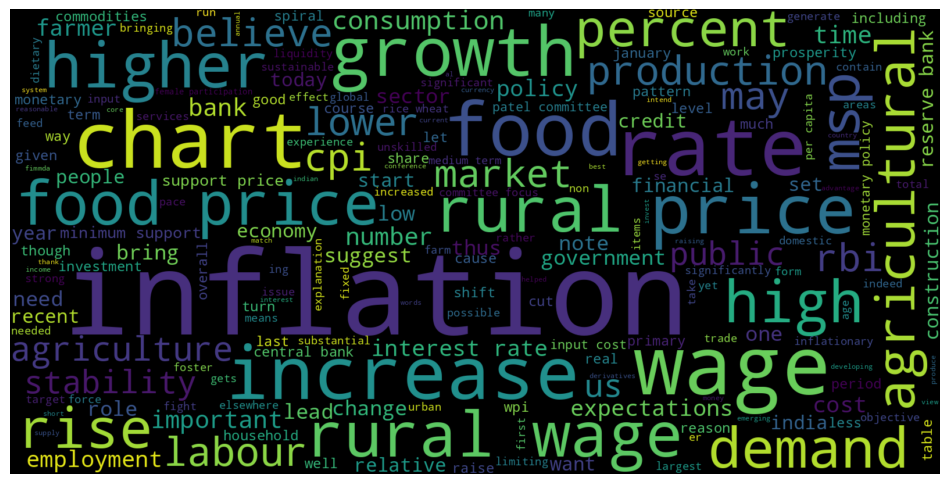

In [4]:
text = get_text('test.pdf')
token = filter(text)
string_list = get_string_from_list(token)
bigram_list = get_bigram(token)
term = stemmer.stem('inflation')



wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(string_list)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [5]:
print(searchAndCountHawkish(bigram_list, term, ConsumerPricesInflation_Hawkish))

92


In [6]:
# make the bigram_list into dictionary with the index as the key and the bigram as the value

def make_bigram_dict(bigram_list):
    bigram_dict = {}
    for i in range(len(bigram_list)):
        bigram_dict[i] = bigram_list[i]
    return bigram_dict

bigram_dict = make_bigram_dict(bigram_list)

# dump to json in readedable format
import json
with open('bigram_dict.json', 'w') as fp:
    json.dump(bigram_dict, fp, indent=4)

In [7]:
print(ConsumerPricesInflation_Hawkish)

['acceler', 'boost', 'elev', 'escal', 'high', 'highten', 'increas', 'jump', 'pickup', 'rise', 'rise', 'rose', 'runup', 'run-up', 'strong', 'surg', 'up']
